# Mapping 

Transportation is about getting from place A to place B.  Therefore, most transportation data has a spatial component to it.  It is nice to be able to put these data on a map and see what is going on.  It is even better if we can put it on a map and interact with the data.  It would be even cooler if we could put our interactive map on a website to show it off!

To do this, we are going to use a package called folium.  You can find the documentation here: 

https://folium.readthedocs.io/en/latest/

And access it on github here: 

https://github.com/python-visualization/folium


### Credits

This lesson draws from the folium quickstart notebook, and from Vik Paruchuri DataQuest lesson: 

https://www.dataquest.io/blog/python-data-visualization-libraries/

### A side note on static mapping

Sometimes you may want to create a static map instead of an interactive map.  Interactive maps are nice for exploring your data, but static maps work well for an image that you can insert into a paper.  If you want to create static maps, then basemap is a good tool.  Here is a nice lesson focused on mapping earthquake activity: 

http://introtopython.org/visualization_earthquakes.html



### OK, back to interactive mapping, because that's fun...

It turns out that folium doesn't do much itself.  It is just a wrapper around something called leafletjs.  You can read more about that here:

http://leafletjs.com/index.html

Leaflet is a library in the JavaScript language.  JavaScript is the language used for most web applications.  We could do the same thing using JavaScript and leaflet directly, but then we would have to learn the syntax for another language.  That might not be too hard, but to keep it simple, we'll stick to the python wrapper for now.  It is good to be aware of, though, because if you want more options than folium allows, you can go directly to leaflet.  

What makes this possible is the fact that leaflet has a well-defined API.  That means that we can pass data back and forth, even from a different language.  


### Setup

Start by installing folium using pip.  At a command prompt, type: 

    pip install folium

Hmm...when I tried this on my desktop, I get an error that says: 

    PermissionError: [WinError 5] Access is denied: 'c:\\program files\\anaconda3\\Lib\\site-packages\\folium'
    
It seems that it is trying to install something in the program files directory, which Windows has protected.  This will depend on the security settings on your machine.  If you get this error, open a command prompt as an administrator.  In the windows search bar, type cmd.  When you see the command prompt, right click, and select run as administrator.  

This did the trick, and now I get: 

    Successfully installed folium-0.2.1
    
In addition, let's go to github and clone the folium repository (https://github.com/python-visualization/folium) to our desktop.  This gives us the source code on our local machine.  What we're really interested in is the examples folder, which gives us a bunch of jupyter notebooks showing how to do different stuff.  You are welcome to explore these as needed. 

You also need to install geopandas, which will make it easier to work with goegraphic data.  The pip installer doesn't work (the long explanation is here: http://geoffboeing.com/2014/09/using-geopandas-windows/), so we'll install using anaconda.  Type: 

    conda install -c conda-forge geopandas
 


Getting Started
---------------

To create a base map, simply pass your starting coordinates to Folium:

In [1]:
import folium

In [2]:
m = folium.Map(location=[38.034,-84.500])

to display it in your notebook, just ask for the object representation. 

In [3]:
m

To save it in a file

In [4]:
m.save('lex.html')

We can use different backgrounds, or tilesets.  Several are built in.  Options include Stamen Terrain, Stamen Toner, Mapbox Bright, and Mapbox Control room tiles. 

In [5]:
folium.Map(
    location=[38.034,-84.500],
    tiles='Stamen Toner',
    zoom_start=13
)

Pick one you like and work with that for the rest of the class.  

Folium also supports Cloudmade and Mapbox custom tilesets- simply pass your key to the API_key keyword.  These are services where you can buy more backgrounds to make your maps look nice. 

```python
folium.Map(location=[45.5236, -122.6750],
           tiles='Mapbox',
           API_key='your.API.key')
```

### Open flights

Let's go back to our openflight data and make some maps. 

In [6]:
import pandas as pd
import numpy as np

In [7]:
# These files use \N as a missing value indicator.  When reading the CSVs, we will tell
# it to use that value as missing or NA.  The double backslash is required because
# otherwise it will interpret \N as a carriage return. 

# Read in the airports data.
airports = pd.read_csv("data/airports.dat", header=None, na_values='\\N')
airports.columns = ["id", "name", "city", "country", "iata", "icao", "latitude", "longitude", "altitude","timezone", "dst", "tz", "type", "source"]

# Read in the airlines data.
airlines = pd.read_csv("data/airlines.dat", header=None, na_values='\\N')
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]

# Read in the routes data.
routes = pd.read_csv("data/routes.dat", header=None, na_values='\\N')
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]

In [8]:
# let's peek at what we have
airports.head()

,id,name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [9]:
airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,-1,Unknown,NaN,-,NaN,NaN,NaN,Y
1,1,Private flight,NaN,-,NaN,NaN,NaN,Y
2,2,135 Airways,NaN,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,NaN,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,NaN,WYT,NaN,United Kingdom,N


In [10]:
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410.0,AER,2965.0,KZN,2990.0,NaN,0,CR2
1,2B,410.0,ASF,2966.0,KZN,2990.0,NaN,0,CR2
2,2B,410.0,ASF,2966.0,MRV,2962.0,NaN,0,CR2
3,2B,410.0,CEK,2968.0,KZN,2990.0,NaN,0,CR2
4,2B,410.0,CEK,2968.0,OVB,4078.0,NaN,0,CR2


Make a map with the airports on it.

In [11]:
# since there are a lot of airports, making the map can be slow
# so limit it to US airports
us_airports = airports[airports['country']=='United States']
len(us_airports)


1435

In [12]:
us_airports.head()

,id,name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,tz,type,source
3200,3411,Barter Island LRRS Airport,Barter Island,United States,BTI,PABA,70.134003,-143.582001,2,-9.0,A,America/Anchorage,airport,OurAirports
3201,3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,LUR,PALU,68.875099,-166.110001,16,-9.0,A,America/Anchorage,airport,OurAirports
3202,3414,Point Lay LRRS Airport,Point Lay,United States,PIZ,PPIZ,69.732903,-163.005005,22,-9.0,A,America/Anchorage,airport,OurAirports
3203,3415,Hilo International Airport,Hilo,United States,ITO,PHTO,19.721399,-155.048004,38,-10.0,N,Pacific/Honolulu,airport,OurAirports
3204,3416,Orlando Executive Airport,Orlando,United States,ORL,KORL,28.545500,-81.332901,113,-5.0,A,America/New_York,airport,OurAirports


In [13]:
# Get a basic world map.
# 30 centers the map E-W, and 0 is the equator
airports_map = folium.Map(location=[30, 0], zoom_start=2)

# Loop through the airports, and draw each one as a marker on the map
# popup tells it what to display when you click on it
for name, row in us_airports.iterrows():
    
    # For some reason, this one airport causes issues with the map.
    if row["name"] != "South Pole Station":
        marker = folium.Marker([row["latitude"], row["longitude"]], popup=row['name'])
        marker.add_to(airports_map)
        
# Save it to a file (it's kinda big for the notebook)
airports_map.save('airports.html')

Hmm...it looks like there are airports everywhere!  Let's try again with smaller makers. 

We can also specify the color.  A list of custom colors is available here: 

http://www.w3schools.com/cssref/css_colors.asp

In [14]:
# over-write the airports_map, rather than just adding more markers to it. 
airports_map = folium.Map(location=[30, 0], zoom_start=2)

# use circle markers this time, with custom size and color
for name, row in us_airports.iterrows():
        
    # For some reason, this one airport causes issues with the map.
    if row["name"] != "South Pole Station":
        marker = folium.CircleMarker([row["latitude"], row["longitude"]], 
                                     radius=5,
                                     color='DarkCyan',
                                     fill_color='DarkCyan', 
                                     popup=row['name'])
        marker.add_to(airports_map)
        
airports_map.save('airports.html')

You can also select icons to use as markers.  That code would look like: 

    marker = folium.Marker([row["latitude"], row["longitude"]], 
                           icon=folium.Icon(icon='cloud'), 
                           popup=row['name'])
                           
The list of icons comes from something called bootstrap, and can be found here: 

http://www.bootstrapicons.com/


Or you can use clusters of markers to clean up the map.  This will group them when you zoom out, similar to a Craigslist map.  You can see how to do that here: 

https://ocefpaf.github.io/python4oceanographers/blog/2015/12/14/geopandas_folium/

You can clean up the rest of this airports map as part of your homework this week.  

Let's draw the routes, but since we have lots, let's just start with the routes departing Lexington. 

In [15]:
# Select the LEX routes, then join the source airports
lex_routes = routes[(routes['source']=="LEX")]
lex_routes = pd.merge(lex_routes, airports, left_on='source_id', right_on='id', how='left')

In [16]:
# join the destination airports.  Here we need to use the suffixes option, because 
# the column names overlap, and we want to distinguish between source and dest
lex_routes = pd.merge(lex_routes, airports, 
                      left_on='dest_id', 
                      right_on='id', 
                      how='left', 
                      suffixes=['_source','_dest'])

In [17]:
# here is what our data looks like
lex_routes

,airline,airline_id,source_x,source_id,dest,dest_id,codeshare,stops,equipment,id_source,...,iata_dest,icao_dest,latitude_dest,longitude_dest,altitude_dest,timezone_dest,dst_dest,tz_dest,type_dest,source
0,9E,3976.0,LEX,4017.0,ATL,3682.0,NaN,0,CRJ,4017,...,ATL,KATL,33.636700,-84.428101,1026,-5.0,A,America/New_York,airport,OurAirports
1,AA,24.0,LEX,4017.0,CLT,3876.0,Y,0,CR7 CRJ,4017,...,CLT,KCLT,35.214001,-80.943100,748,-5.0,A,America/New_York,airport,OurAirports
2,AA,24.0,LEX,4017.0,DFW,3670.0,Y,0,ERD ER4,4017,...,DFW,KDFW,32.896801,-97.038002,607,-6.0,A,America/Chicago,airport,OurAirports
3,AA,24.0,LEX,4017.0,ORD,3830.0,Y,0,ERD ER4,4017,...,ORD,KORD,41.978600,-87.904800,672,-6.0,A,America/Chicago,airport,OurAirports
4,AF,137.0,LEX,4017.0,ATL,3682.0,Y,0,CRJ CR9,4017,...,ATL,KATL,33.636700,-84.428101,1026,-5.0,A,America/New_York,airport,OurAirports
5,DL,2009.0,LEX,4017.0,ATL,3682.0,NaN,0,M88 717,4017,...,ATL,KATL,33.636700,-84.428101,1026,-5.0,A,America/New_York,airport,OurAirports
6,DL,2009.0,LEX,4017.0,DCA,3520.0,Y,0,CRJ,4017,...,DCA,KDCA,38.852100,-77.037697,15,-5.0,A,America/New_York,airport,OurAirports
7,DL,2009.0,LEX,4017.0,DTW,3645.0,Y,0,CR7 CRJ CR9,4017,...,DTW,KDTW,42.212399,-83.353401,645,-5.0,A,America/New_York,airport,OurAirports
8,DL,2009.0,LEX,4017.0,LGA,3697.0,NaN,0,ERJ,4017,...,LGA,KLGA,40.777199,-73.872597,21,-5.0,A,America/New_York,airport,OurAirports
9,DL,2009.0,LEX,4017.0,MSP,3858.0,Y,0,CRJ,4017,...,MSP,KMSP,44.882000,-93.221802,841,-6.0,A,America/Chicago,airport,OurAirports


In [18]:
# It looks like source has some duplicate names.  Drop the values from the airports
# file ane keep the one from the routes file
lex_routes = lex_routes.drop(['source_y','source'], axis=1)
lex_routes = lex_routes.rename(columns={'source_x': 'source'})

In [19]:
# Let's keep only one route between each airport pair
# so we don't have a bunch of lines on top of each other
# The subset option tells it to consider just those columns when determining
# what is a duplicate. 

lex_routes = lex_routes.drop_duplicates(subset=['source', 'dest'])
lex_routes

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment,id_source,...,country_dest,iata_dest,icao_dest,latitude_dest,longitude_dest,altitude_dest,timezone_dest,dst_dest,tz_dest,type_dest
0,9E,3976.0,LEX,4017.0,ATL,3682.0,NaN,0,CRJ,4017,...,United States,ATL,KATL,33.636700,-84.428101,1026,-5.0,A,America/New_York,airport
1,AA,24.0,LEX,4017.0,CLT,3876.0,Y,0,CR7 CRJ,4017,...,United States,CLT,KCLT,35.214001,-80.943100,748,-5.0,A,America/New_York,airport
2,AA,24.0,LEX,4017.0,DFW,3670.0,Y,0,ERD ER4,4017,...,United States,DFW,KDFW,32.896801,-97.038002,607,-6.0,A,America/Chicago,airport
3,AA,24.0,LEX,4017.0,ORD,3830.0,Y,0,ERD ER4,4017,...,United States,ORD,KORD,41.978600,-87.904800,672,-6.0,A,America/Chicago,airport
6,DL,2009.0,LEX,4017.0,DCA,3520.0,Y,0,CRJ,4017,...,United States,DCA,KDCA,38.852100,-77.037697,15,-5.0,A,America/New_York,airport
7,DL,2009.0,LEX,4017.0,DTW,3645.0,Y,0,CR7 CRJ CR9,4017,...,United States,DTW,KDTW,42.212399,-83.353401,645,-5.0,A,America/New_York,airport
8,DL,2009.0,LEX,4017.0,LGA,3697.0,NaN,0,ERJ,4017,...,United States,LGA,KLGA,40.777199,-73.872597,21,-5.0,A,America/New_York,airport
9,DL,2009.0,LEX,4017.0,MSP,3858.0,Y,0,CRJ,4017,...,United States,MSP,KMSP,44.882000,-93.221802,841,-6.0,A,America/Chicago,airport
10,G4,35.0,LEX,4017.0,FLL,3533.0,NaN,0,M80,4017,...,United States,FLL,KFLL,26.072599,-80.152702,9,-5.0,A,America/New_York,airport
11,G4,35.0,LEX,4017.0,PGD,7056.0,NaN,0,M80,4017,...,United States,PGD,KPGD,26.920200,-81.990501,26,-5.0,A,America/New_York,airport


That looks better.  Now, let's create a map.  To avoid adding duplicate airports, we are going to use a container called a set.  A set is an unordered collection of unique elements.  This means we can keep adding LEX to the set, and end up with only 1 LEX in the end.  

In [20]:
# create a basic map, centered on Lexington
lex_air = folium.Map(
    location=[38.034,-84.500],
    tiles='Stamen Toner',
    zoom_start=4
)

In [21]:
# Define some empty sets
airport_set = set()
route_set = set()

# Make sure we don't add duplicates, especially for the origins
for name, row in lex_routes.iterrows():
    
    if row['source'] not in airport_set: 
        popup_string = row['city_source'] + ' (' + row['source'] + ')'
        marker = folium.CircleMarker([row["latitude_source"], row["longitude_source"]], 
                                     color='DarkCyan',
                                     fill_color='DarkCyan', 
                                     radius=5, popup=popup_string)
        marker.add_to(lex_air)
        airport_set.add(row['source'])
        
    if row['dest'] not in airport_set: 
        popup_string = row['city_dest'] + '(' + row['dest'] + ')'
        marker = folium.CircleMarker([row["latitude_dest"], row["longitude_dest"]], 
                                     color='MidnightBlue',
                                     fill_color='MidnightBlue', 
                                     radius=5, popup=popup_string)
        marker.add_to(lex_air)
        airport_set.add(row['dest'])
    
    # the parentheses in the indicate that we are adding a tuple to the route_set
    if (row['source'],row['dest']) not in route_set:            
        popup_string = row['source'] + '-' + row['dest']        
        line = folium.PolyLine([(row["latitude_source"], row["longitude_source"]), 
                                (row["latitude_dest"], row["longitude_dest"])], 
                                weight=2, 
                                popup=popup_string)
        line.add_to(lex_air)
        route_set.add((row['source'],row['dest']))
        
lex_air

That's cool.  But airplanes don't fly in a straight line.  They follow the great circle.  So when you fly from Chicago to London, you go over Greenland (which is really pretty on a clear day!).  Can we make the lines follow a great circle? 

It looks like there are some options here: 

http://gis.stackexchange.com/questions/47/what-tools-in-python-are-available-for-doing-great-circle-distance-line-creati

Let's try one of them. 

In [22]:
import pyproj

# when creating a function, it is good practice to define the API!
def getGreatCirclePoints(startlat, startlon, endlat, endlon): 
    """
    startlat - starting latitude 
    startlon - starting longitude 
    endlat   - ending latitude 
    endlon   - ending longitude 
    
    returns - a list of tuples, where each tuple is the lat-long for a point
              along the curve.  
    """
    # calculate distance between points
    g = pyproj.Geod(ellps='WGS84')
    (az12, az21, dist) = g.inv(startlon, startlat, endlon, endlat)

    # calculate line string along path with segments <= 20 km
    lonlats = g.npts(startlon, startlat, endlon, endlat,
                     1 + int(dist / 20000))

    # the npts function uses lon-lat, while the folium functions use lat-lon
    # This sort of thing is maddening!  What happens is the lines don't show
    # up on the map and you don't know why.  Learn from my mistakes
    latlons = []
    for lon_lat in lonlats: 
        
        # this is how you get values out of a tuple
        (lon, lat) = lon_lat
        
        # add them to our list
        latlons.append((lat, lon)) 
    
    # npts doesn't include start/end points, so prepend/append them
    latlons.insert(0, (startlat, startlon))
    latlons.append((endlat, endlon))
    
    return latlons


In [23]:
# any time we write a function, we should test that it works
p = getGreatCirclePoints(38.034, -84.500, 33.636700, -84.428101) 
p

[(38.034, -84.5),
 (37.864933929949096, -84.49708149511396),
 (37.695862920583586, -84.49417629534568),
 (37.52678697986378, -84.49128425988357),
 (37.35770611591111, -84.48840524964173),
 (37.18862033700805, -84.48553912723197),
 (37.019529651598035, -84.48268575693639),
 (36.85043406828536, -84.47984500468044),
 (36.68133359583508, -84.4770167380065),
 (36.51222824317288, -84.474200826048),
 (36.343118019385024, -84.47139713950395),
 (36.17400293371815, -84.46860555061399),
 (36.00488299557918, -84.46582593313389),
 (35.83575821453518, -84.46305816231151),
 (35.66662860031317, -84.46030211486323),
 (35.49749416279997, -84.45755766895067),
 (35.328354912042094, -84.45482470415813),
 (35.15921085824549, -84.45210310147009),
 (34.99006201177538, -84.44939274324938),
 (34.82090838315613, -84.44669351321562),
 (34.65174998307092, -84.44400529642411),
 (34.48258682236167, -84.44132797924507),
 (34.3134189120287, -84.43866144934323),
 (34.14424626323062, -84.43600559565783),
 (33.9750688872

In [24]:
# create a basic map, centered on Lexington
lex_air = folium.Map(
    location=[38.034,-84.500],
    tiles='Stamen Toner',
    zoom_start=4
)

In [25]:
# define the map in the same way, but use great circles for the lines

# Define some empty sets
airport_set = set()
route_set = set()

# Make sure we don't add duplicates, especially for the origins
for name, row in lex_routes.iterrows():
    
    if row['source'] not in airport_set: 
        popup_string = row['city_source'] + ' (' + row['source'] + ')'
        marker = folium.CircleMarker([row["latitude_source"], row["longitude_source"]], 
                                     color='DarkCyan',
                                     fill_color='DarkCyan', 
                                     radius=5, popup=popup_string)
        marker.add_to(lex_air)
        airport_set.add(row['source'])
        
    if row['dest'] not in airport_set: 
        popup_string = row['city_dest'] + '(' + row['dest'] + ')'
        marker = folium.CircleMarker([row["latitude_dest"], row["longitude_dest"]], 
                                     color='MidnightBlue',
                                     fill_color='MidnightBlue', 
                                     radius=5, popup=popup_string)
        marker.add_to(lex_air)
        airport_set.add(row['dest'])
    
    # PolyLine will accept a whole list of tuples, not just two
    if (row['source'],row['dest']) not in route_set:            
        popup_string = row['source'] + '-' + row['dest']       
        
        gc_points = getGreatCirclePoints(row["latitude_source"], 
                                         row["longitude_source"], 
                                         row["latitude_dest"], 
                                         row["longitude_dest"])
        
        line = folium.PolyLine(gc_points, weight=2, popup=popup_string)
        line.add_to(lex_air)
        route_set.add((row['source'],row['dest']))
        
lex_air   

In [26]:
# save it to its own file
lex_air.save("lex_air.html")

### Your turn

The above map shows everywhere you can get to from Lexington on a direct flight.  Your job is to:

1. Make a map of all the possible destinations with one transfer. 
2. Make a map of all the possible desitnations with two transfers. 

Make the maps look nice!  Use color coding, vary the size of the features, or be selective about what you display in order to communicate the information effectively.  

Bonus: This is the air travel version of the Kevin Bacon game (https://oracleofbacon.org/).  What is the number N, such that you can reach every airport in the world with N or fewer transfers?  

Extra Bonus: Use this very important piece of knowledge to impress your friends at parties!

In [6]:
import folium

In [7]:
s = folium.Map(location=[41.878113,-87.629799])

In [8]:
s

In [9]:
ord_air = folium.Map(
    location=[41.878113,-87.629799],
    tiles='Stamen Toner',
    zoom_start=15
)

In [10]:
import pandas as pd
import numpy as np


In [11]:
airports_map = folium.Map(location=[30, 0], zoom_start=2)

# Loop through the airports, and draw each one as a marker on the map
# popup tells it what to display when you click on it
for name, row in us_airports.iterrows():
    
    # For some reason, this one airport causes issues with the map.
    if row["name"] != "South Pole Station":
        marker = folium.Marker([row["latitude"], row["longitude"]], popup=row['name'])
        marker.add_to(airports_map)

NameError: name 'us_airports' is not defined

In [12]:
airports = pd.read_csv("data/airports.dat", header=None, na_values='\\N')
airports.columns = ["id", "name", "city", "country", "iata", "icao", "latitude", "longitude", "altitude","timezone", "dst", "tz", "type", "source"]

airlines = pd.read_csv("data/airlines.dat", header=None, na_values='\\N')
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]

routes = pd.read_csv("data/routes.dat", header=None, na_values='\\N')
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]


In [13]:
us_airports = airports[airports['country']=='United States']

In [14]:
airports_map = folium.Map(location=[30, 0], zoom_start=2)

for name, row in us_airports.iterrows():
        
    if row["name"] != "South Pole Station":
        marker = folium.CircleMarker([row["latitude"], row["longitude"]], 
                                     radius=5,
                                     color='DarkCyan',
                                     fill_color='DarkCyan', 
                                     popup=row['name'])
        marker.add_to(airports_map)
        
airports_map.save('airports.html')

In [15]:
ord_routes = routes[(routes['source']=="ORD")]
ord_routes = pd.merge(ord_routes, airports, left_on='source_id', right_on='id', how='left')

In [16]:
ord_routes

,airline,airline_id,source_x,source_id,dest,dest_id,codeshare,stops,equipment,id,...,iata,icao,latitude,longitude,altitude,timezone,dst,tz,type,source_y
0,3E,10739.0,ORD,3830.0,BRL,5726.0,NaN,0,CNC,3830,...,ORD,KORD,41.9786,-87.9048,672,-6.0,A,America/Chicago,airport,OurAirports
1,3E,10739.0,ORD,3830.0,DEC,4042.0,NaN,0,CNC,3830,...,ORD,KORD,41.9786,-87.9048,672,-6.0,A,America/Chicago,airport,OurAirports
2,AA,24.0,ORD,3830.0,ABQ,4019.0,Y,0,E75,3830,...,ORD,KORD,41.9786,-87.9048,672,-6.0,A,America/Chicago,airport,OurAirports
3,AA,24.0,ORD,3830.0,ALO,5718.0,Y,0,ERD,3830,...,ORD,KORD,41.9786,-87.9048,672,-6.0,A,America/Chicago,airport,OurAirports
4,AA,24.0,ORD,3830.0,AMM,2170.0,Y,0,340,3830,...,ORD,KORD,41.9786,-87.9048,672,-6.0,A,America/Chicago,airport,OurAirports
5,AA,24.0,ORD,3830.0,ART,3838.0,Y,0,ERD,3830,...,ORD,KORD,41.9786,-87.9048,672,-6.0,A,America/Chicago,airport,OurAirports
6,AA,24.0,ORD,3830.0,ATL,3682.0,Y,0,E75 CR7,3830,...,ORD,KORD,41.9786,-87.9048,672,-6.0,A,America/Chicago,airport,OurAirports
7,AA,24.0,ORD,3830.0,AUH,2179.0,Y,0,777,3830,...,ORD,KORD,41.9786,-87.9048,672,-6.0,A,America/Chicago,airport,OurAirports
8,AA,24.0,ORD,3830.0,AUS,3673.0,NaN,0,M80 M83,3830,...,ORD,KORD,41.9786,-87.9048,672,-6.0,A,America/Chicago,airport,OurAirports
9,AA,24.0,ORD,3830.0,AZO,4039.0,Y,0,ER4 ERD,3830,...,ORD,KORD,41.9786,-87.9048,672,-6.0,A,America/Chicago,airport,OurAirports


In [17]:
#Make a map of all the possible destinations with one transfer.

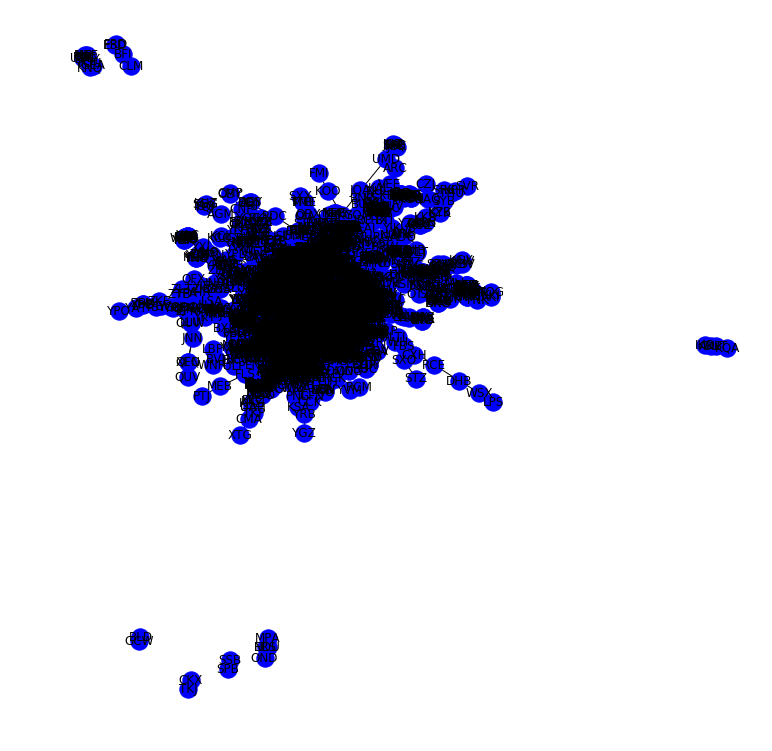

In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
df= routes[['source','dest']]
plt.figure(figsize=(10,10))
g= nx.from_pandas_edgelist(routes, source='source', target='dest')
nx.draw(g,node_color='BLUE', with_labels=True)
plt.show()